# Import Pandas

The usual convention is to name Pandas "pd."

In [19]:
import pandas as pd

# What is a series?

A series (often called "s" in notebooks) is a one-dimensional data structure like a list.

You can create a series by passing a regular Python list to pd.Series()

In [2]:
budget = [75, 90, 90, 95, 50]

budget

[75, 90, 90, 95, 50]

In [3]:
s = pd.Series(budget)

s

0    75
1    90
2    90
3    95
4    50
dtype: int64

In [4]:
s.describe()

count     5.000000
mean     80.000000
std      18.371173
min      50.000000
25%      75.000000
50%      90.000000
75%      90.000000
max      95.000000
dtype: float64

In [5]:
s.value_counts()

90    2
95    1
75    1
50    1
dtype: int64

In [20]:
s.sort_values(ascending=False)

3    95
2    90
1    90
0    75
4    50
dtype: int64

# What is a data frame?

A data frame is a two-dimensional data structure, similar to an Excel table. Two-dimensional means it has both an X and Y axis.

You can create a data frame by passing a dictionary to pd.DataFrame. The column headers shoudl be the key and the column data should be the value (a list). You can also import a CSV with the pd.read_csv() function, an example starts off the Airbnb analysis notebook.

In [7]:
budget_dictionary = {
    'month': ['Jun', 'Jul', 'Aug', 'Sep', 'Oct'],
    'budget': budget,
    'cookie_budget': [5, 5, 5, 5, 3]
}

budget_dictionary

{'month': ['Jun', 'Jul', 'Aug', 'Sep', 'Oct'],
 'budget': [75, 90, 90, 95, 50],
 'cookie_budget': [5, 5, 5, 5, 3]}

In [8]:
df = pd.DataFrame(budget_dictionary)

df

,month,budget,cookie_budget
0,Jun,75,5
1,Jul,90,5
2,Aug,90,5
3,Sep,95,5
4,Oct,50,3


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
month            5 non-null object
budget           5 non-null int64
cookie_budget    5 non-null int64
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes


# Extracting columns

You can pull out the column of a data frame as a series with this syntax:

```python
df['column_name']
```

or this syntax

```python
df.column_name
```

In [22]:
cookie_budget = df['cookie_budget']

type(cookie_budget)

pandas.core.series.Series

In [25]:
cookie_budget.value_counts()

5    4
3    1
Name: cookie_budget, dtype: int64

# Indexing with booleans

You can use a conditional to get a series of booleans, and you can then use the series of booleans to extract data that matches the conditional.

In [27]:
about_80_booleans = df['budget'] > 80
 
about_80_booleans

0    False
1     True
2     True
3     True
4    False
Name: budget, dtype: bool

In [28]:
df[about_80_booleans]['month']

1    Jul
2    Aug
3    Sep
Name: month, dtype: object

# Get the second row in the data frame as a series using iloc

In [29]:
df.iloc[2]

month            Aug
budget            90
cookie_budget      5
Name: 2, dtype: object

# Write our data frame to a CSV file

In [30]:
df.to_csv('cookie_budget.csv')

# Create a pie chart showing which months had a cookie budget of \\$3 or \\$5

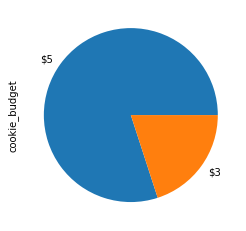

In [17]:
cookie_counts = cookie_budget.value_counts()

df['cookie_budget'].value_counts().plot(kind='pie', labels=['$5', '$3'])